In [1]:
import pandas as pd 
import numpy as np
import os 
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
from patsy import dmatrix
import statsmodels.api as sm
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
os.getcwd()

'/Users/zed/VSCode/regana/hw5'

# .

In [3]:
train_data = pd.read_csv(os.getcwd()+"/yelp_train.csv")
test_data = pd.read_csv(os.getcwd()+"/yelp_test.csv")

In [4]:
train_data

funny  useful  user_cool  characters  user_average_stars  \
0         0       0          0        1031                4.33   
1         0       0         51        1333                4.17   
2         0       1          0         313                2.40   
3         7       6       1074        3285                3.71   
4         0       3          3         492                3.00   
...     ...     ...        ...         ...                 ...   
2995      6       6          0         553                0.00   
2996      0       0          0         529                2.00   
2997      0       0        241         219                3.71   
2998      0       0          1         835                3.00   
2999      0       0          8         588                3.70   

      biz_review_count  user_useful  user_funny  biz_open  stars        date  \
0                    6            1           0         1      5  2012-07-16   
1                    6          147          27         1      2  2011-04-23   
2                   77            4           0         1      2  2012-06-11   
3                    9         1299        1105         0      1  2009-06-18   
4                   79           10           0         1      2  2011-03-18   
...                ...          ...         ...       ...    ...         ...   
2995               118            0           0         1      2  2012-01-26   
2996                10            5           0         1      1  2012-10-06   
2997                32          506         151         1      4  2011-01-03   
2998                69            3           1         1      2  2012-10-27   
2999                14           29           3         1      4  2011-05-14   

      biz_stars  words  user_review_count  cool  
0           4.0    195                  6     0  
1           3.5    271                212     0  
2           4.0     61                  5     0  
3           3.0    612                350     5  
4           3.0     96                  5     0  
...         ...    ...                ...   ...  
2995        3.5     99                  0     6  
2996        3.0    110                  5     0  
2997        3.5     42                293     0  
2998        4.5    158                  2     0  
2999        3.5    119                 23     1  

[3000 rows x 15 columns]

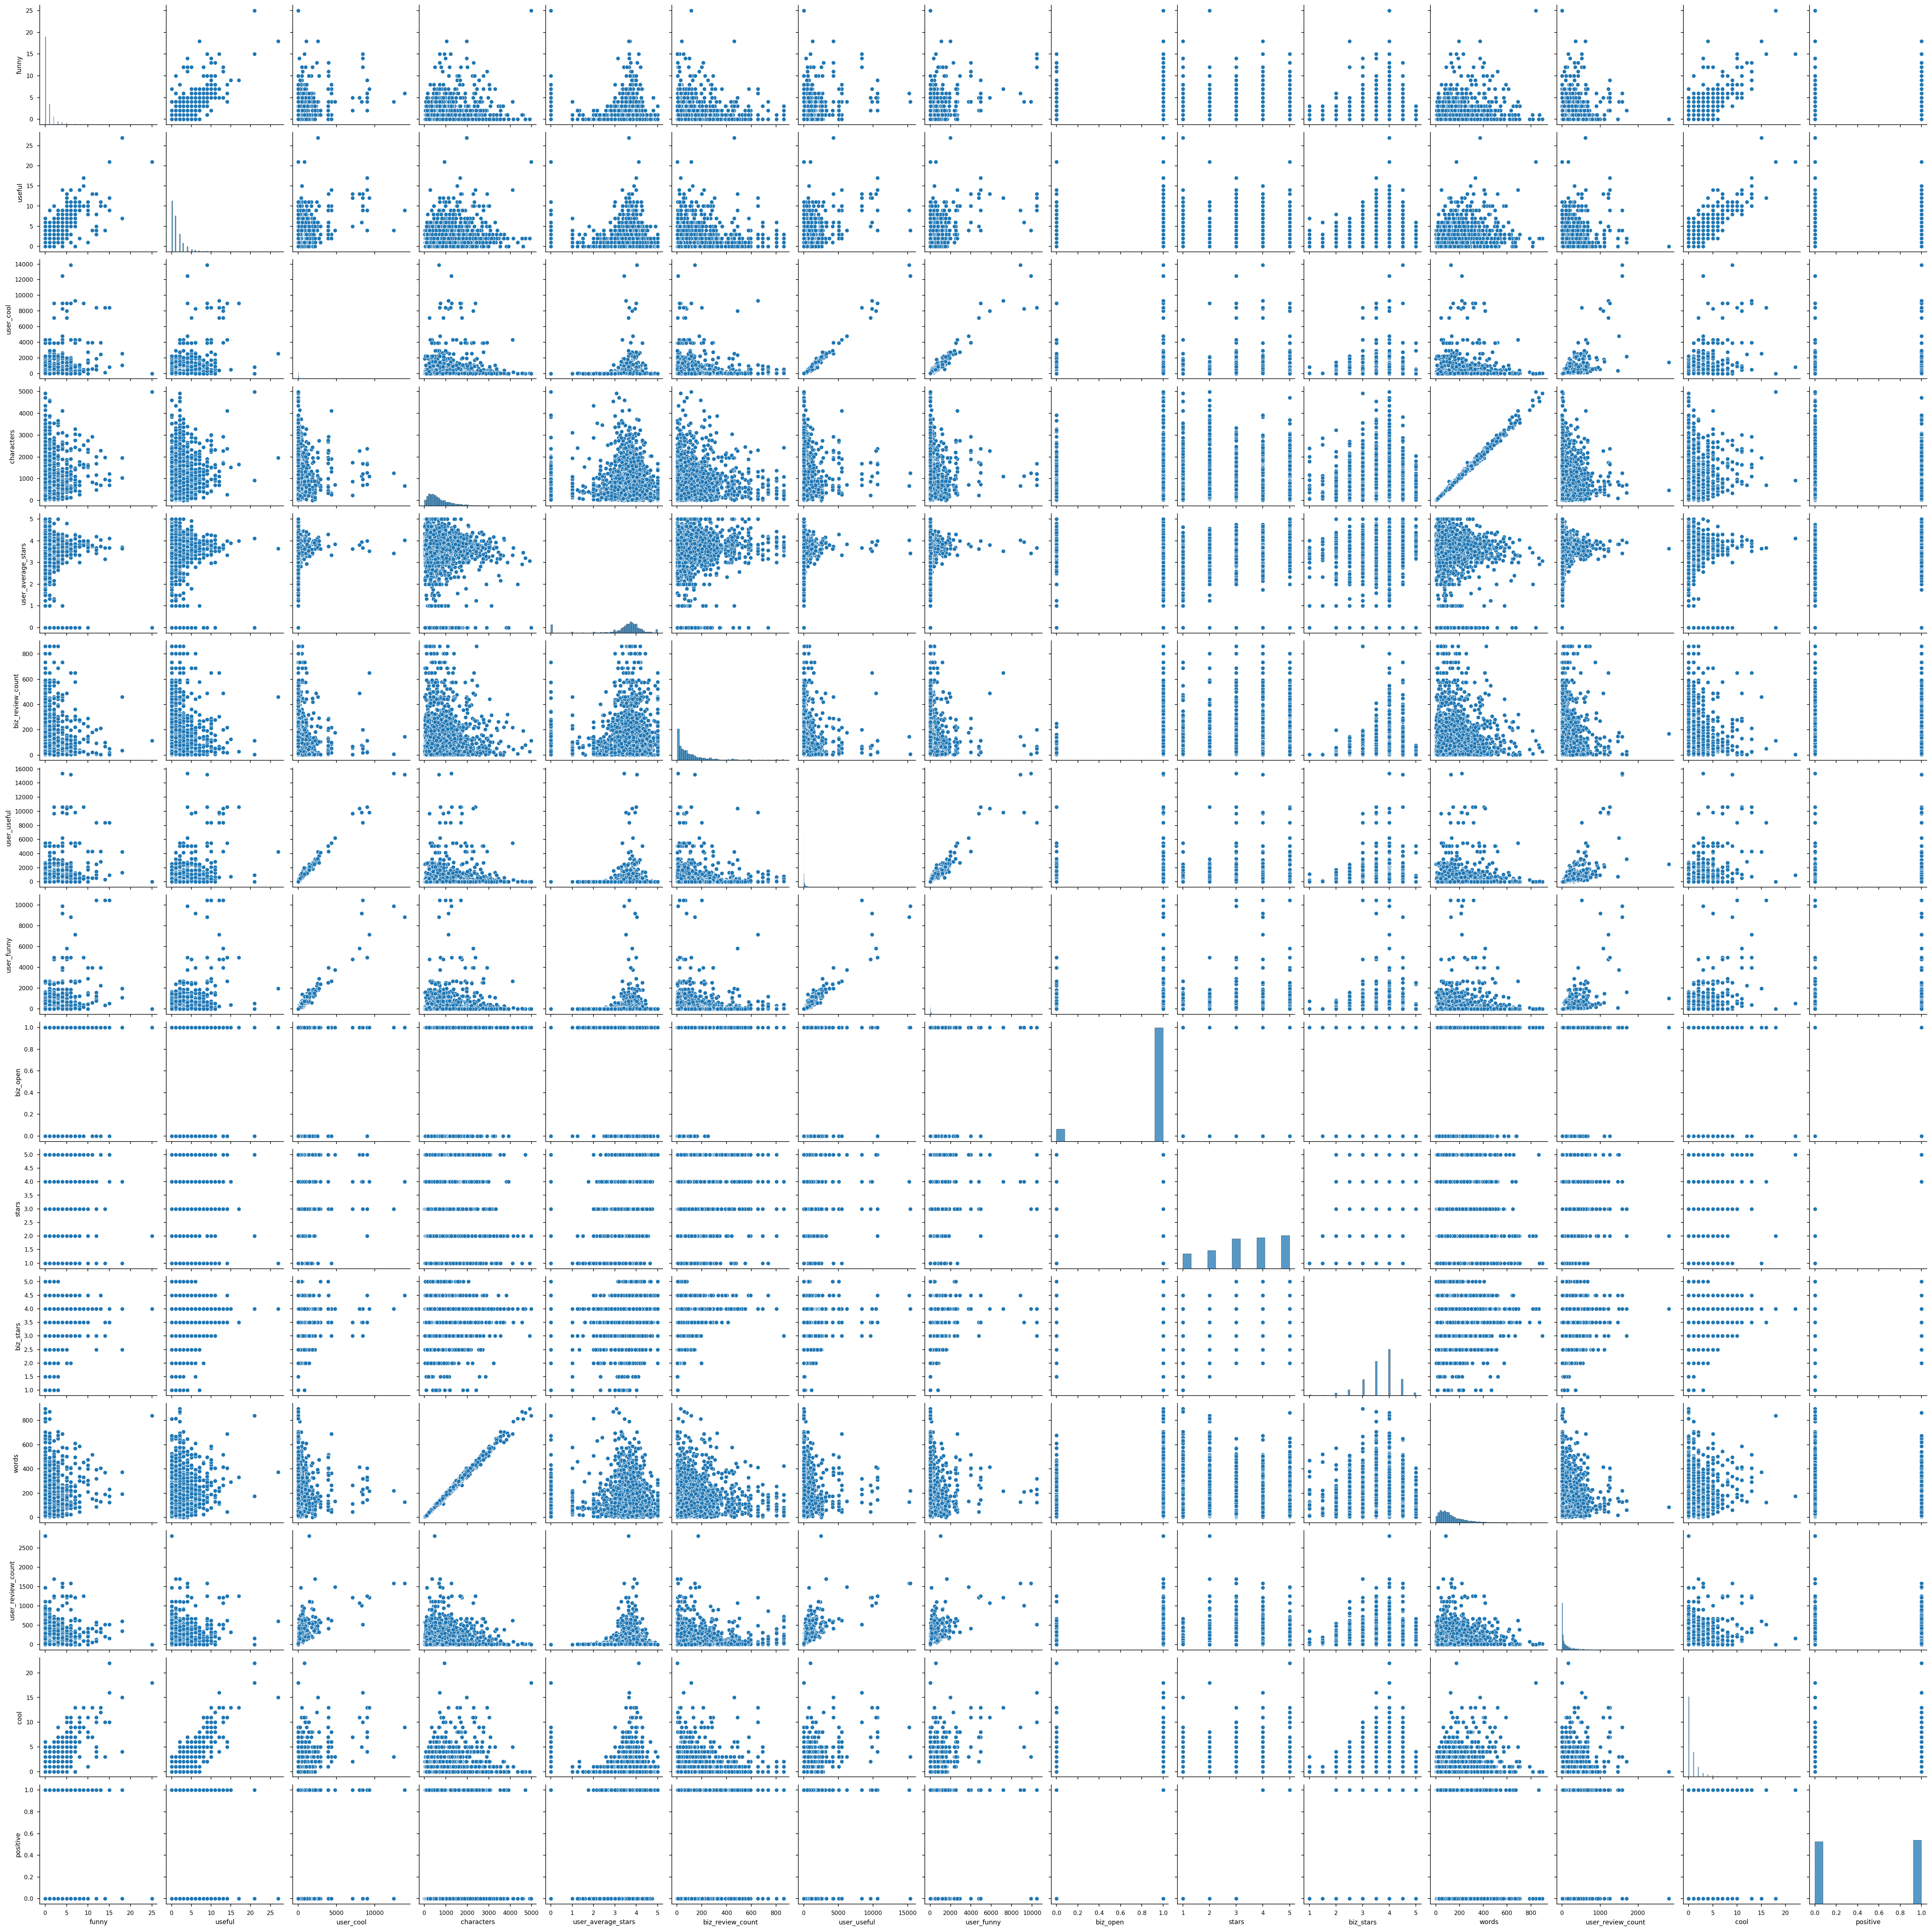

funny       useful     user_cool   characters  \
count  3000.000000  3000.000000   3000.000000  3000.000000   
mean      0.704000     1.402667    239.933667   728.046000   
std       1.703335     2.071865    842.444306   636.213189   
min       0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000      2.000000   299.750000   
50%       0.000000     1.000000     15.000000   547.000000   
75%       1.000000     2.000000    114.250000   949.500000   
max      25.000000    27.000000  13900.000000  4975.000000   

       user_average_stars  biz_review_count   user_useful    user_funny  \
count         3000.000000       3000.000000   3000.000000   3000.000000   
mean             3.450530        108.552667    339.082000    195.452667   
std              1.085882        138.342182   1014.800595    687.824590   
min              0.000000          3.000000      0.000000      0.000000   
25%              3.370000         20.000000      8.000000      2.000000   
50%              3.710000         62.000000     45.000000     13.000000   
75%              4.000000        137.250000    225.250000     91.000000   
max              5.000000        862.000000  15384.000000  10451.000000   

          biz_open        stars    biz_stars        words  user_review_count  \
count  3000.000000  3000.000000  3000.000000  3000.000000        3000.000000   
mean      0.902000     3.392333     3.687500   134.695000         119.882667   
std       0.297364     1.321485     0.649154   117.308569         199.291913   
min       0.000000     1.000000     1.000000     0.000000           0.000000   
25%       1.000000     2.000000     3.500000    55.000000           9.000000   
50%       1.000000     4.000000     4.000000   102.000000          38.500000   
75%       1.000000     5.000000     4.000000   179.000000         145.000000   
max       1.000000     5.000000     5.000000   896.000000        2810.000000   

              cool     positive  
count  3000.000000  3000.000000  
mean      0.795333     0.506000  
std       1.689693     0.500047  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     1.000000  
max      22.000000     1.000000

In [172]:
train_data.describe()

In [173]:
train_data.corr()

funny    useful  user_cool  characters  \
funny               1.000000  0.744310   0.450516    0.272387   
useful              0.744310  1.000000   0.489974    0.338544   
user_cool           0.450516  0.489974   1.000000    0.139505   
characters          0.272387  0.338544   0.139505    1.000000   
user_average_stars -0.029839 -0.027346   0.081731   -0.045480   
biz_review_count    0.029147  0.055385  -0.000840    0.032827   
user_useful         0.435464  0.490415   0.991886    0.142962   
user_funny          0.501472  0.483262   0.955364    0.140020   
biz_open           -0.047415 -0.037678  -0.033174   -0.058818   
stars              -0.101711 -0.086826   0.017048   -0.168416   
biz_stars          -0.032870 -0.004339  -0.000633   -0.032635   
words               0.268252  0.334163   0.135114    0.997667   
user_review_count   0.255981  0.285063   0.672559    0.080054   
cool                0.793406  0.829058   0.550129    0.267783   
positive           -0.080125 -0.067668  -0.013520   -0.154252   

                    user_average_stars  biz_review_count  user_useful  \
funny                        -0.029839          0.029147     0.435464   
useful                       -0.027346          0.055385     0.490415   
user_cool                     0.081731         -0.000840     0.991886   
characters                   -0.045480          0.032827     0.142962   
user_average_stars            1.000000          0.050784     0.090366   
biz_review_count              0.050784          1.000000    -0.001746   
user_useful                   0.090366         -0.001746     1.000000   
user_funny                    0.074429          0.000017     0.933978   
biz_open                      0.022518          0.133129    -0.032464   
stars                         0.259028          0.120754     0.012352   
biz_stars                     0.095064          0.214146    -0.004291   
words                        -0.044741          0.029307     0.138231   
user_review_count             0.142727         -0.000342     0.726941   
cool                          0.008004          0.055730     0.538060   
positive                      0.179526          0.083952    -0.021169   

                    user_funny  biz_open     stars  biz_stars     words  \
funny                 0.501472 -0.047415 -0.101711  -0.032870  0.268252   
useful                0.483262 -0.037678 -0.086826  -0.004339  0.334163   
user_cool             0.955364 -0.033174  0.017048  -0.000633  0.135114   
characters            0.140020 -0.058818 -0.168416  -0.032635  0.997667   
user_average_stars    0.074429  0.022518  0.259028   0.095064 -0.044741   
biz_review_count      0.000017  0.133129  0.120754   0.214146  0.029307   
user_useful           0.933978 -0.032464  0.012352  -0.004291  0.138231   
user_funny            1.000000 -0.029221  0.012576  -0.003161  0.136224   
biz_open             -0.029221  1.000000  0.063934   0.102131 -0.056671   
stars                 0.012576  0.063934  1.000000   0.486190 -0.176193   
biz_stars            -0.003161  0.102131  0.486190   1.000000 -0.039364   
words                 0.136224 -0.056671 -0.176193  -0.039364  1.000000   
user_review_count     0.617151 -0.015904 -0.004910  -0.033633  0.077514   
cool                  0.555544 -0.049887  0.048666   0.038797  0.263074   
positive             -0.013044  0.073472  0.861579   0.410247 -0.160834   

                    user_review_count      cool  positive  
funny                        0.255981  0.793406 -0.080125  
useful                       0.285063  0.829058 -0.067668  
user_cool                    0.672559  0.550129 -0.013520  
characters                   0.080054  0.267783 -0.154252  
user_average_stars           0.142727  0.008004  0.179526  
biz_review_count            -0.000342  0.055730  0.083952  
user_useful                  0.726941  0.538060 -0.021169  
user_funny                   0.617151  0.555544 -0.013044  
biz_open                    -0.015904 -0.049887  0.073472  
stars       

## .

In [171]:
sns.pairplot(train_data.drop(['date'],axis=1))

In [5]:
 train_data["positive"]= pd.Series((map(lambda x:(1 if x>=4 else 0),train_data["stars"])))

In [6]:
 test_data["positive"]= pd.Series((map(lambda x:(1 if x>=4 else 0),test_data["stars"])))

## .

In [7]:
naive_clf = linear_model.LogisticRegression()

In [8]:
df = train_data
train_x = df.drop(["date","stars","positive"],axis=1)
train_y = df["positive"]
df = test_data
test_x = df.drop(["date","stars","positive"],axis=1)
test_y = df["positive"]

In [9]:

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.fit_transform(test_x)

In [11]:
naive_clf.fit(train_x,train_y)

LogisticRegression()

In [12]:
naive_clf.score(train_x,train_y)

0.7103333333333334

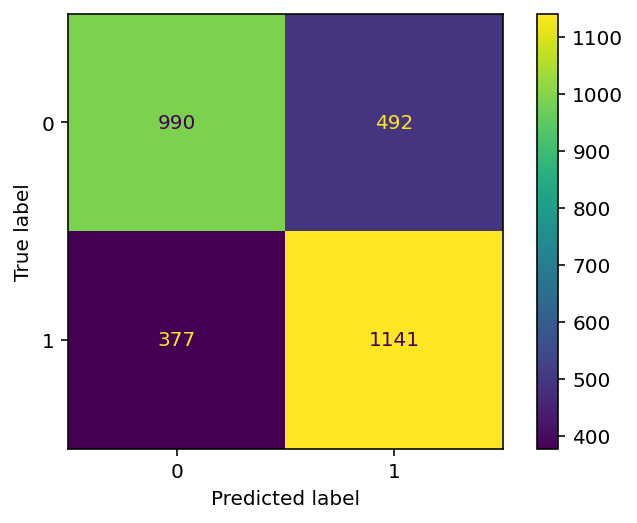

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 

train_matrix = confusion_matrix(train_y, naive_clf.predict(train_x))
disp = ConfusionMatrixDisplay(confusion_matrix=train_matrix,
                               display_labels=naive_clf.classes_)
disp.plot()

In [14]:
naive_clf.score(test_x,test_y)

0.681

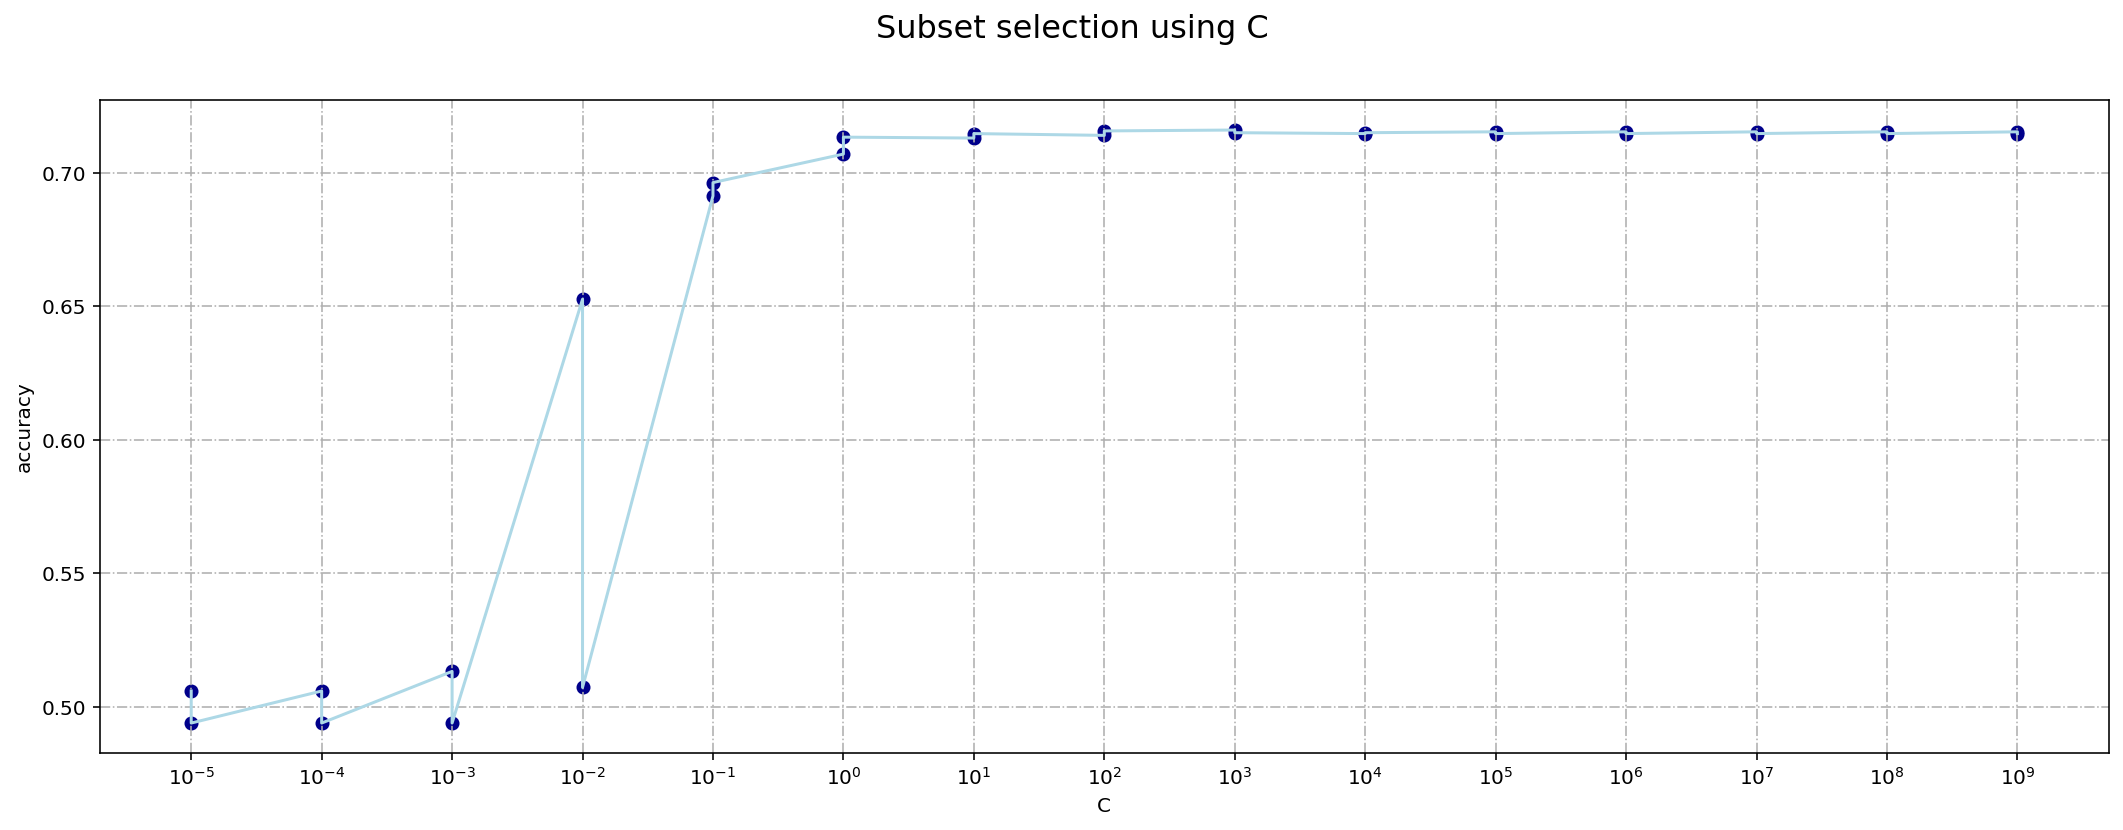

In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':['l2','l1'], 'solver':['liblinear'],'C':[10**x for x in range(-5,10)]}
svc = linear_model.LogisticRegression()
clf = GridSearchCV(svc, parameters,cv=10,scoring='accuracy')
clf.fit(train_x,train_y)
df_results = pd.DataFrame({'c':clf.cv_results_["param_C"].data,'accuracy':clf.cv_results_["mean_test_score"].data})
df_results = df_results.dropna(how = "any")


clf.best_params_
fig = plt.figure(figsize = (18,6))
v = 'accuracy'
ax = fig.subplots(1, 1)

ax.grid(True, linestyle='-.')
ax.set_xscale('log')
ax.set_xticks([10**x for x in range(-5,10)])
ax.plot(df_results['c'],df_results[v], color = 'lightblue')
ax.scatter(df_results['c'],df_results[v], color = 'darkblue')
ax.set_xlabel('C')
ax.set_ylabel(v)
fig.suptitle('Subset selection using ' + "C", fontsize = 16)
plt.show()

In [140]:
my_clf = linear_model.LogisticRegression(**clf.best_params_)

In [141]:
my_clf.fit(train_x,train_y)
print(my_clf.score(train_x,train_y))
print(my_clf.score(test_x,test_y))

0.721
0.666


In [142]:
my_clf.coef_

array([[ -9.26404575,  -6.62238746,   1.62956476,  20.25451308,
          1.71202417,  -0.2596829 ,  -4.27017226,   3.11972754,
          0.22633474,   6.55514447, -22.35141067,  -2.43399062,
         14.53024401]])

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(train_x)

pca_train_x  = pca.transform(train_x)
pca_test_x = pca.transform(test_x)

In [144]:
pca_clf = linear_model.LogisticRegression(**clf.best_params_)
pca_clf.fit(pca_train_x,train_y)
print(pca_clf.score(pca_train_x,train_y))
print(pca_clf.score(pca_test_x,test_y))

0.7033333333333334
0.688


In [183]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

lrcv = LogisticRegressionCV(cv = 10,penalty='l1',Cs = 100,solver = 'liblinear',max_iter = 1e5)
lrcv.fit(train_x, train_y)

selection = SelectFromModel(lrcv,prefit = True)
selection.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [179]:
for x in range(train_x.shape[1]):
    if selection.get_support()[x] ==1:
        print(train_data.columns[x])

funny
useful
characters
user_average_stars
biz_review_count
user_useful
user_funny
biz_open
stars
date
biz_stars
words


In [146]:
from pygam import LogisticGAM

In [147]:
gam = LogisticGAM().gridsearch(train_x, train_y)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     24.2433
Link Function:                        LogitLink Log Likelihood:                                 -1495.7725
Number of Samples:                         3000 AIC:                                             3040.0317
                                                AICc:                                            3040.4772
                                                UBRE:                                               3.0198
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2806
Feature Function                  Lam

In [157]:
gam.accuracy(test_x,test_y)

0.723

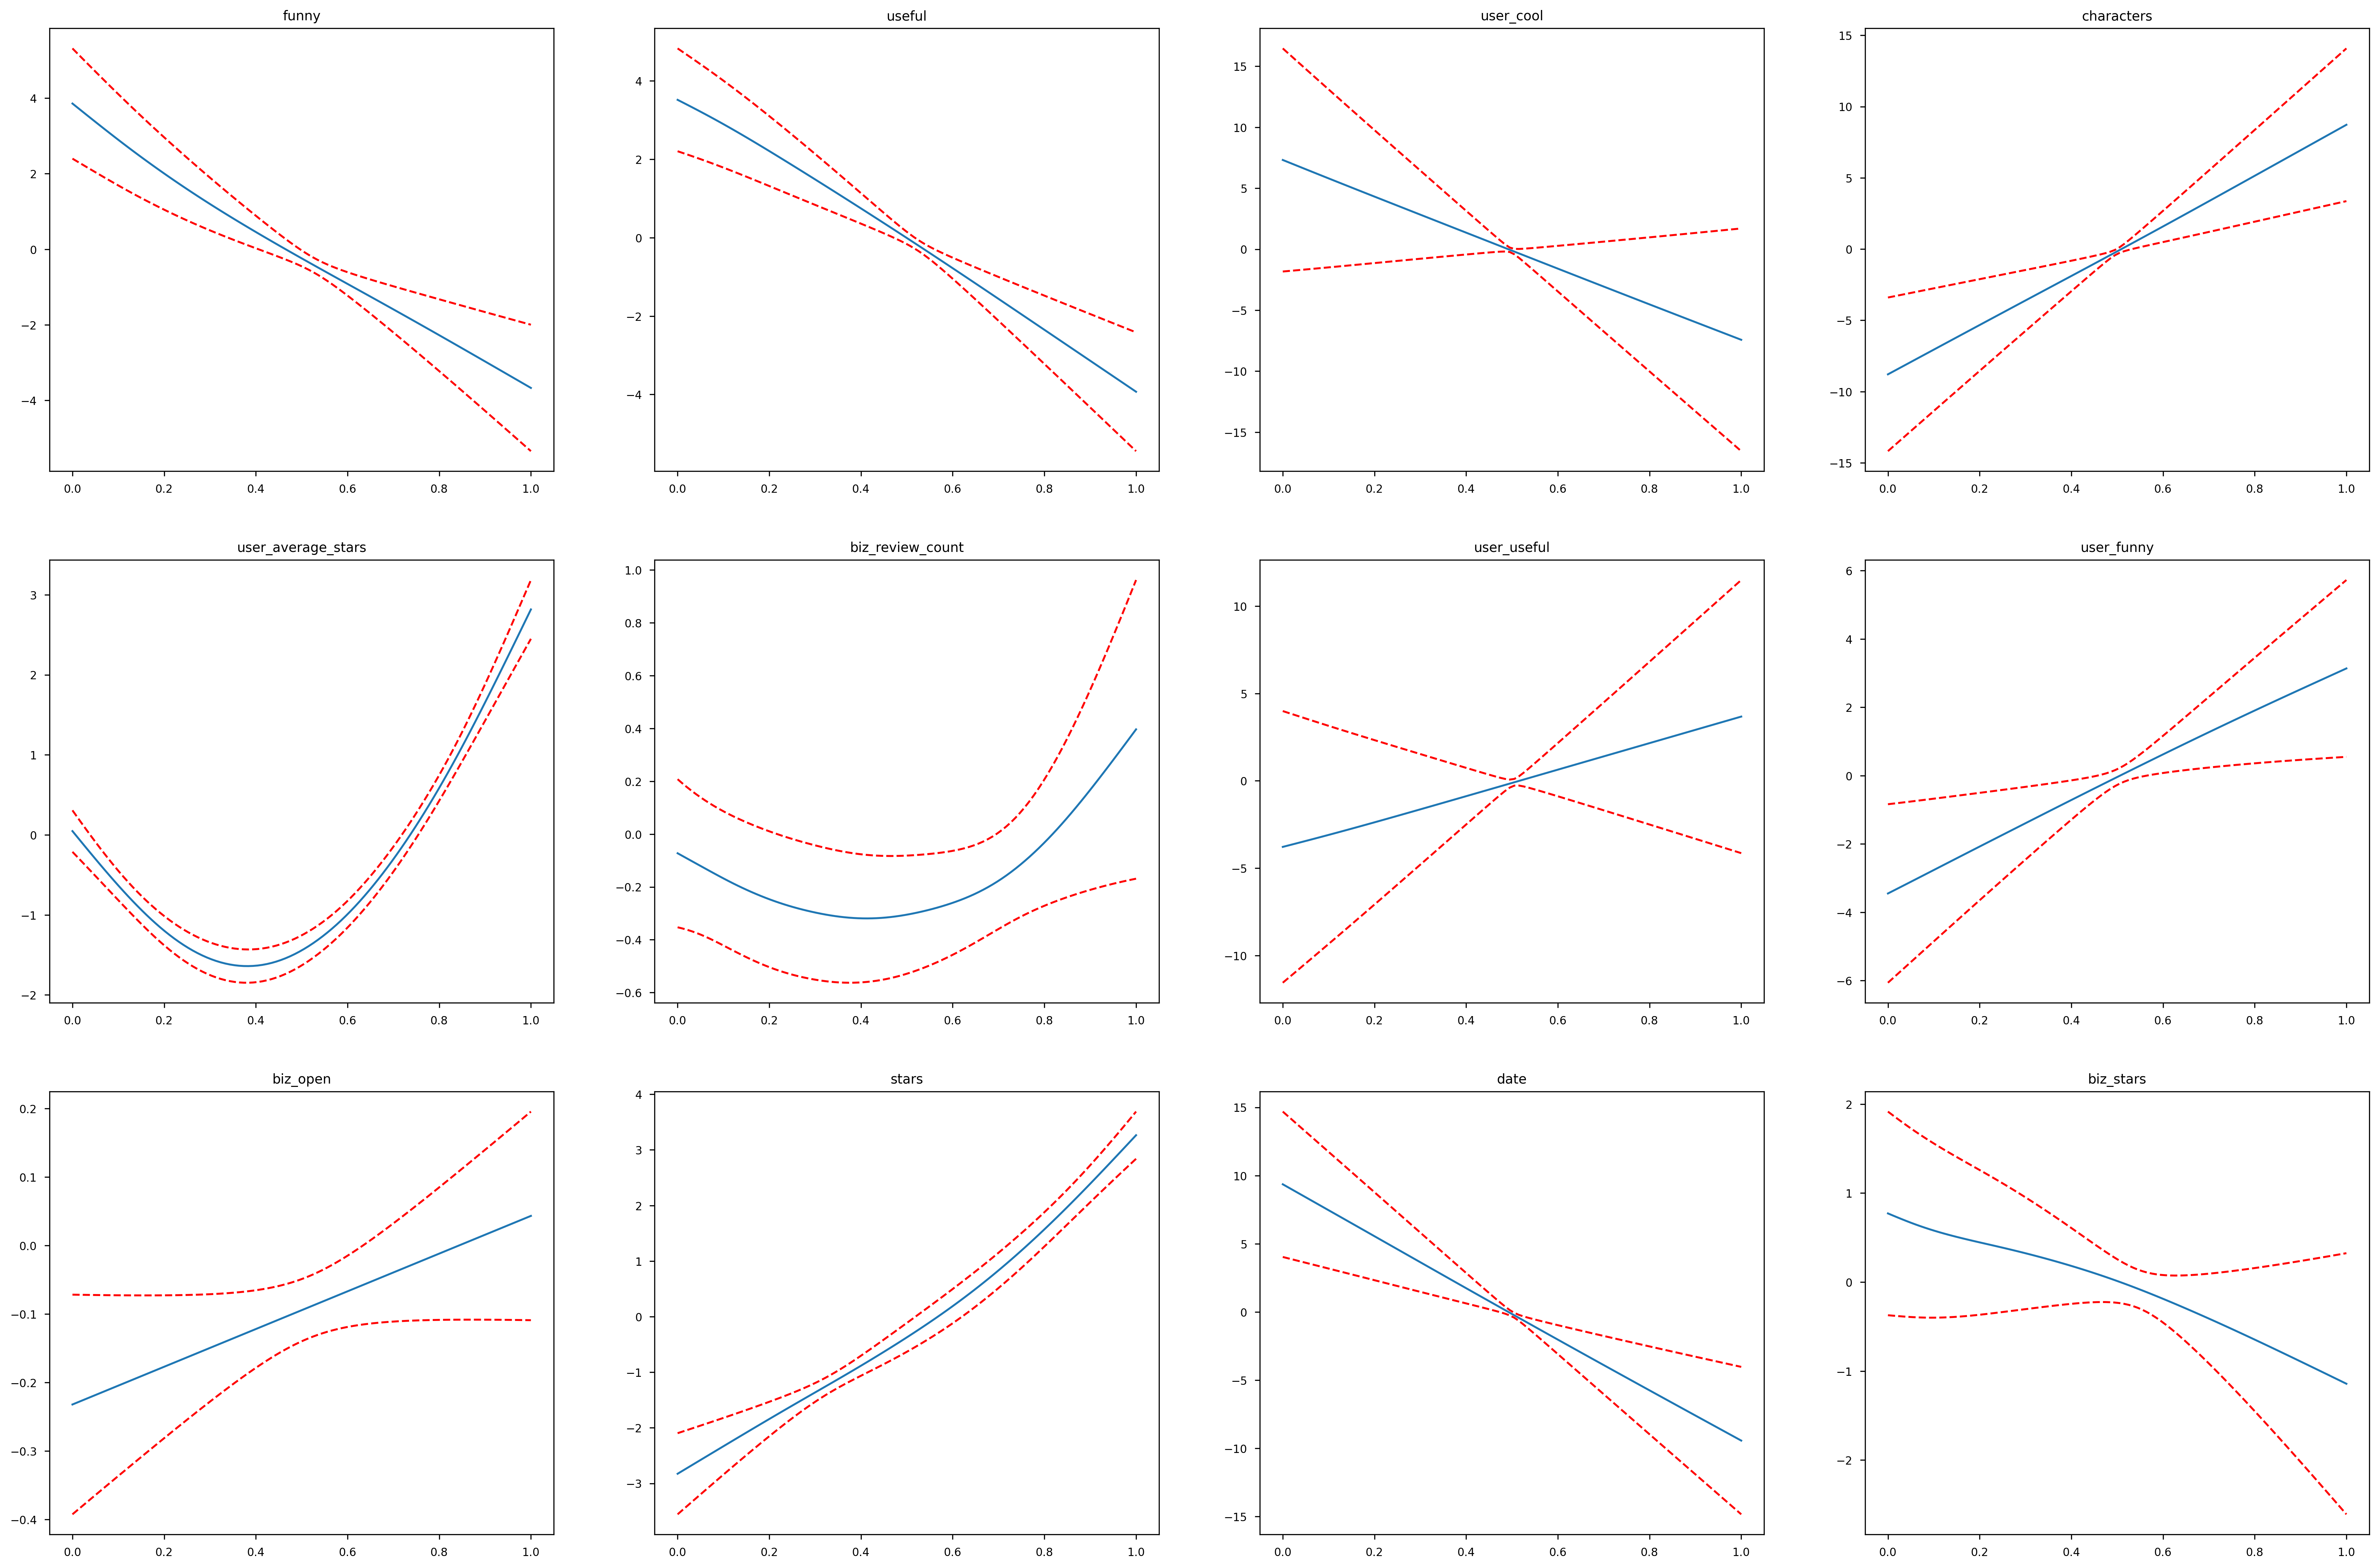

In [161]:
titles = train_data.columns 
t = 0
fig, axs = plt.subplots(3,4,figsize = (30,20),dpi =150)
plt.style.use('seaborn-paper')
for i in range(3):
    for j in range(4):
        XX = gam.generate_X_grid(term=t)
        pdep, confi = gam.partial_dependence(term=t, width=.95)
        axs[i][j].plot(XX[:, t], pdep)
        axs[i][j].plot(XX[:, t], confi, c='r', ls='--')
        axs[i][j].set_title(titles[t])
        t+=1
        
plt.savefig("gam.png")

We first preprocess the dataset and show the relation between variables.For the variables have high correlation, we think we can use shrink method in the feature selection process to drop them out of our model.Then we use logistic regression to our classification task. We use grid search to find the best penalty and PCA to find the most useful variables.But the performance of PCA is not good..Then we use LogisticGAM to see the relation ship between the y and x. We find that  if the number of positive comment is greater than the past average, the reviews tend to be positive. 

# .

In [21]:
data = pd.read_csv(os.getcwd()+"/bone.csv")

In [22]:
data 

idnum    age  gender    spnbmd
0        1  11.70    male  0.018081
1        1  12.70    male  0.060109
2        1  13.75    male  0.005858
3        2  13.25    male  0.010264
4        2  14.30    male  0.210526
..     ...    ...     ...       ...
480    380  11.60    male  0.116368
481    381   9.80  female  0.097902
482    382  11.90    male  0.028986
483    383  11.20    male -0.064103
484    384   9.80  female  0.049908

[485 rows x 4 columns]

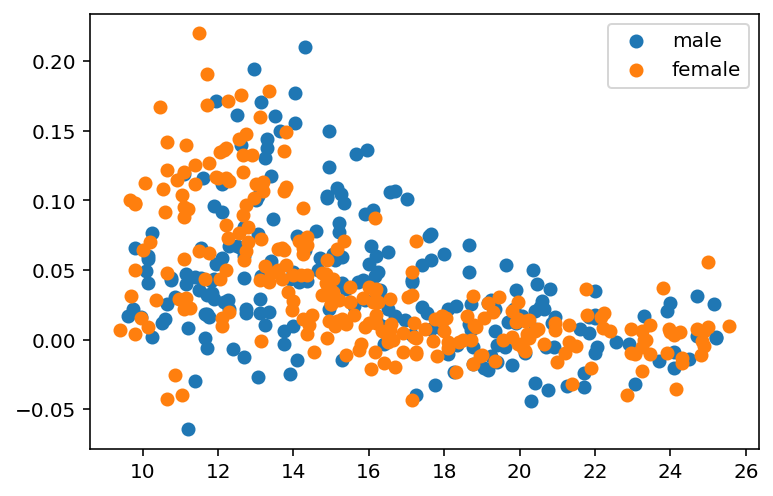

In [23]:
fig = plt.figure()
male = data[data["gender"]=="male"][["age","spnbmd"]]
female = data[data["gender"]=="female"][["age","spnbmd"]]
plt.scatter(male["age"],male["spnbmd"],label = "male")
plt.scatter(female["age"],female["spnbmd"],label = "female")
plt.legend()


there are differences in bone mineral density (BMD) trajectories between males and females

### step function (3 coef fitted)

In [24]:
class step_func:
    def __init__(self,x,y,NUM_CUTS):
        self.x = x
        self.y = y
        # Dividing the data into 4 bins
        self.df_cut, self.bins = pd.cut(x, NUM_CUTS, retbins=True, right=True)
        df_steps_dummies = pd.get_dummies(self.df_cut)
        df_steps_dummies = df_steps_dummies.drop(df_steps_dummies.columns[0], axis = 1)
        self.df_steps_dummies = df_steps_dummies
    def fit(self):
        model = sm.OLS(self.y, sm.add_constant(self.df_steps_dummies)).fit()
        self.model = model
        return self.model.summary()
    def plot(self):
        # make the plot
        x_space = np.linspace(self.x.min(),self.x.max()-1,100) 
        bin_mapping = np.digitize(x_space, self.bins)  # use the same bins
        x_space_dummy = pd.get_dummies(bin_mapping) 
        x_space_dummy = x_space_dummy.drop(x_space_dummy.columns[0], axis = 1)
        pred = self.model.predict(sm.add_constant(x_space_dummy))

        plt.scatter(self.x, self.y, facecolor='None', edgecolor='k', alpha=0.3)
        plt.plot(x_space,pred,'r-')
        plt.title('d=2')
        plt.show()



In [25]:
stepfunctions = step_func(male['age'],male['spnbmd'],3)

In [26]:
stepfunctions.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     20.48
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           6.81e-09
Time:                        21:47:16   Log-Likelihood:                 381.68
No. Observations:                 226   AIC:                            -757.4
Df Residuals:                     223   BIC:                            -747.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0566      0.005     12.317      0.000       0.048       0.066
(14.8, 20.0]    -0.0179      0.007     -2.690      0.008      -0.031      -0.005
(20.0, 25.2]    -0.0528      0.008     -6.395      0.000      -0.069      -0.037
==============================================================================
Omnibus:                       22.815   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.077
Skew:                           0.751   Prob(JB):                     1.32e-06
Kurtosis:                       3.789   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

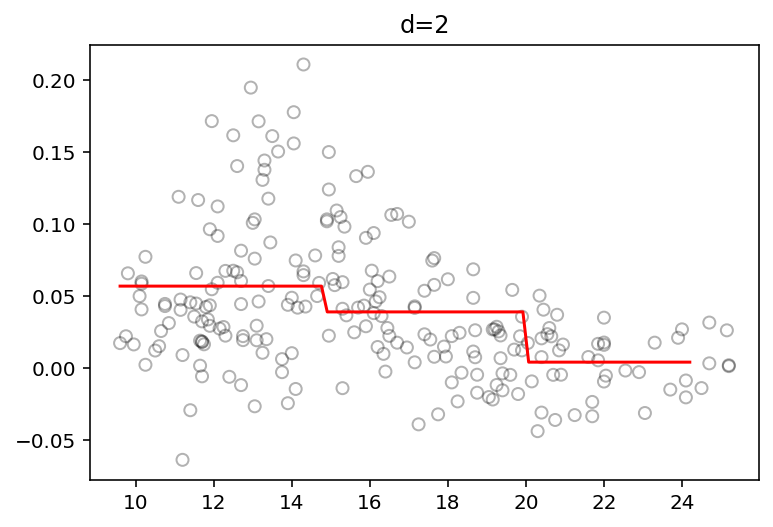

In [27]:
stepfunctions.plot()

In [162]:
stepfunctions = step_func(female['age'],female['spnbmd'],3)

In [165]:
stepfunctions.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           5.90e-34
Time:                        23:09:29   Log-Likelihood:                 483.70
No. Observations:                 259   AIC:                            -961.4
Df Residuals:                     256   BIC:                            -950.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0773      0.004     21.757      0.000       0.070       0.084
(14.783, 20.167]    -0.0633      0.005    -12.128      0.000      -0.074      -0.053
(20.167, 25.55]     -0.0761      0.006    -11.898      0.000      -0.089      -0.064
==============================================================================
Omnibus:                       13.248   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.019
Skew:                           0.243   Prob(JB):                     3.69e-06
Kurtosis:                       4.443   Cond. No.                         3.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

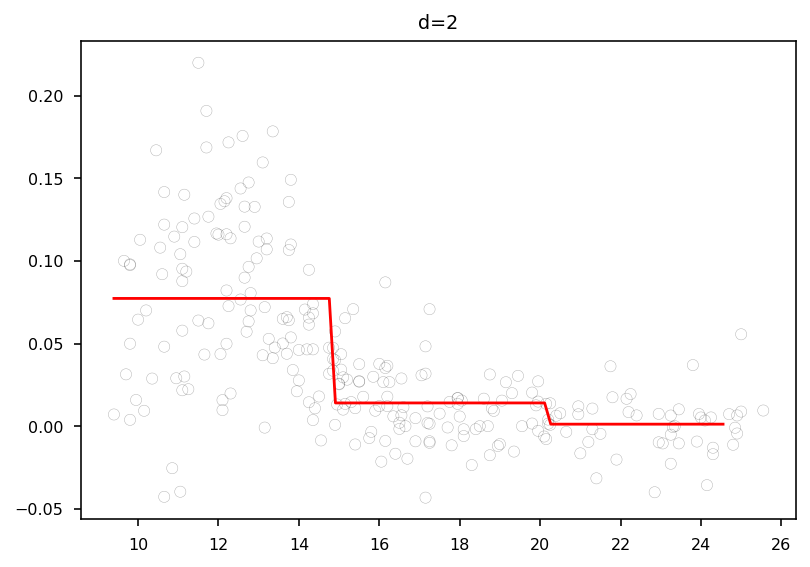

In [166]:
stepfunctions.plot()

### Cubic Spline (6 fitted) &  Natural Spline (5 fitted)

In [28]:
class Spline:
    def __init__(self,x,y):
        self.x = x
        self.y = y 
        notec = (np.percentile(x.values, 33),np.percentile(x.values, 67))
        self.cubic = "bs(x, knots=" + str(notec)+ ",degree=3, include_intercept=False)"
        self.natual = "cr(x,knots="+str(notec)+")"
        self.transformed_x = dmatrix(self.cubic, {"x":x},return_type='dataframe')
        self.transformed_x2 = dmatrix(self.natual, {"x": x}, return_type='dataframe')
        self.x_space = np.linspace(x.min(),x.max(),70)
    def cubicfit(self):
        self.model = sm.OLS(self.y,self.transformed_x).fit()
        self.pred = self.model.predict(dmatrix(self.cubic,{"x": self.x_space},return_type='dataframe'))
        return self.model.summary()
    def naturalfit(self):
        self.model2 = sm.OLS(self.y, self.transformed_x2).fit()
        self.pred2 = self.model2.predict(dmatrix(self.natual, {"x": self.x_space}, return_type='dataframe'))
        return self.model2.summary()
    def quadratic(self):
        self.model3 = sm.OLS(self.y,self.transformed_x).fit()
        self.pred3 = self.model3.predict(dmatrix(self.cubic,{"x": self.x_space},return_type='dataframe'))
        return self.model3.summary()
    
    def plot(self,title):
        plt.subplot()
        x_space = self.x_space 
        plt.title(title)
        plt.scatter(self.x,self.y, facecolor='None', edgecolor='k', alpha=0.5)
        plt.plot(x_space, self.pred, label='Specifying degree =3 with 3 knots')
        plt.plot(x_space,self.pred2,label="Natural spline")
        plt.legend()
        plt.xlabel('age')
        plt.ylabel("spnbmd")
        plt.show()
    def plot_quad(self,title):
        plt.subplot()
        x_space = self.x_space 
        plt.title(title)
        plt.scatter(self.x,self.y, facecolor='None', edgecolor='k', alpha=0.5)
        plt.plot(x_space, self.pred3, label='Specifying degree =2 with 3 knots')
        plt.legend()
        plt.xlabel('age')
        plt.ylabel("spnbmd")
        plt.show()

In [29]:
male_sp = Spline(male['age'],male['spnbmd'])

In [30]:
male_sp.cubicfit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     19.10
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           9.10e-16
Time:                        21:47:16   Log-Likelihood:                 403.36
No. Observations:                 226   AIC:                            -794.7
Df Residuals:                     220   BIC:                            -774.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 0.0428      0.019      2.274      0.024       0.006       0.080
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[0]    -0.0350      0.030     -1.157      0.248      -0.095       0.025
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[1]     0.0856      0.020      4.211      0.000       0.046       0.126
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[2]    -0.0699      0.030     -2.295      0.023      -0.130      -0.010
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[3]    -0.0323      0.027     -1.195      0.233      -0.085       0.021
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[4]    -0.0390      0.027     -1.467      0.144      -0.091       0.013
==============================================================================
Omnibus:                       10.895   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.331
Skew:                           0.419   Prob(JB):                      0.00210
Kurtosis:                       3.779   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
male_sp.naturalfit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     29.83
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.04e-16
Time:                        21:47:16   Log-Likelihood:                 400.90
No. Observations:                 226   AIC:                            -793.8
Df Residuals:                     222   BIC:                            -780.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.0226      0.003      7.266      0.000       0.016       0.029
cr(x, knots=(13.4125, 17.9375))[0]    -0.0135      0.010     -1.383      0.168      -0.033       0.006
cr(x, knots=(13.4125, 17.9375))[1]     0.0507      0.005     10.256      0.000       0.041       0.060
cr(x, knots=(13.4125, 17.9375))[2]     0.0031      0.006      0.556      0.579      -0.008       0.014
cr(x, knots=(13.4125, 17.9375))[3]    -0.0177      0.011     -1.635      0.103      -0.039       0.004
==============================================================================
Omnibus:                        9.911   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.768
Skew:                           0.407   Prob(JB):                      0.00459
Kurtosis:                       3.692   Cond. No.                     6.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.63e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
male_sp.quadratic()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     19.10
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           9.10e-16
Time:                        21:47:16   Log-Likelihood:                 403.36
No. Observations:                 226   AIC:                            -794.7
Df Residuals:                     220   BIC:                            -774.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 0.0428      0.019      2.274      0.024       0.006       0.080
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[0]    -0.0350      0.030     -1.157      0.248      -0.095       0.025
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[1]     0.0856      0.020      4.211      0.000       0.046       0.126
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[2]    -0.0699      0.030     -2.295      0.023      -0.130      -0.010
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[3]    -0.0323      0.027     -1.195      0.233      -0.085       0.021
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[4]    -0.0390      0.027     -1.467      0.144      -0.091       0.013
==============================================================================
Omnibus:                       10.895   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.331
Skew:                           0.419   Prob(JB):                      0.00210
Kurtosis:                       3.779   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

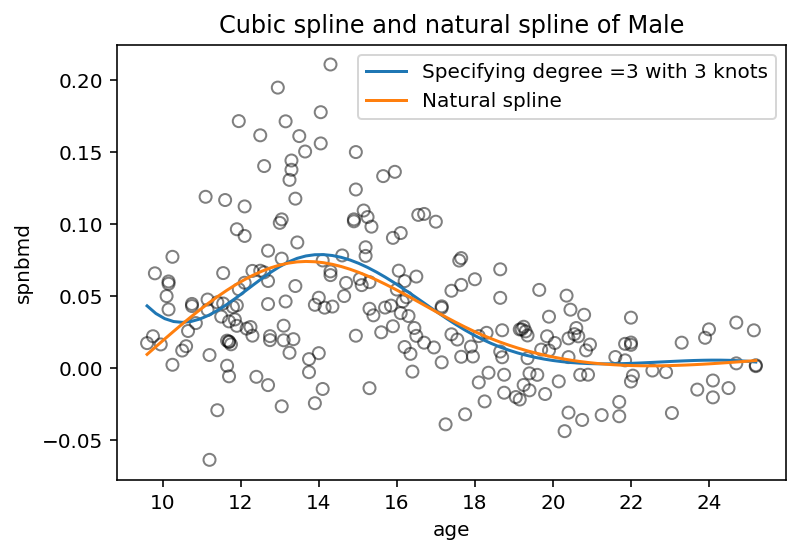

In [33]:
male_sp.plot("Cubic spline and natural spline of Male")

In [35]:
female_sp = Spline(female['age'],female['spnbmd'])

In [36]:
female_sp.cubicfit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     52.40
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.56e-37
Time:                        21:47:17   Log-Likelihood:                 498.34
No. Observations:                 259   AIC:                            -984.7
Df Residuals:                     253   BIC:                            -963.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             0.0149      0.015      0.978      0.329      -0.015       0.045
bs(x, knots=(13.7, 17.672), degree=3, include_intercept=False)[0]     0.1224      0.026      4.729      0.000       0.071       0.173
bs(x, knots=(13.7, 17.672), degree=3, include_intercept=False)[1]     0.0439      0.016      2.774      0.006       0.013       0.075
bs(x, knots=(13.7, 17.672), degree=3, include_intercept=False)[2]    -0.0446      0.025     -1.787      0.075      -0.094       0.005
bs(x, knots=(13.7, 17.672), degree=3, include_intercept=False)[3]     0.0055      0.023      0.238      0.812      -0.040       0.051
bs(x, knots=(13.7, 17.672), degree=3, include_intercept=False)[4]    -0.0202      0.023     -0.874      0.383      -0.066       0.025
==============================================================================
Omnibus:                       15.738   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.161
Skew:                          -0.047   Prob(JB):                     2.57e-10
Kurtosis:                       5.021   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
female_sp.naturalfit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     70.23
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.88e-33
Time:                        21:47:17   Log-Likelihood:                 484.28
No. Observations:                 259   AIC:                            -960.6
Df Residuals:                     255   BIC:                            -946.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0341      0.002     13.973      0.000       0.029       0.039
cr(x, knots=(13.7, 17.672))[0]     0.0431      0.008      5.400      0.000       0.027       0.059
cr(x, knots=(13.7, 17.672))[1]     0.0333      0.004      7.977      0.000       0.025       0.042
cr(x, knots=(13.7, 17.672))[2]    -0.0278      0.005     -5.926      0.000      -0.037      -0.019
cr(x, knots=(13.7, 17.672))[3]    -0.0145      0.009     -1.704      0.090      -0.031       0.002
==============================================================================
Omnibus:                       13.859   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.904
Skew:                           0.283   Prob(JB):                     3.91e-06
Kurtosis:                       4.410   Cond. No.                     1.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

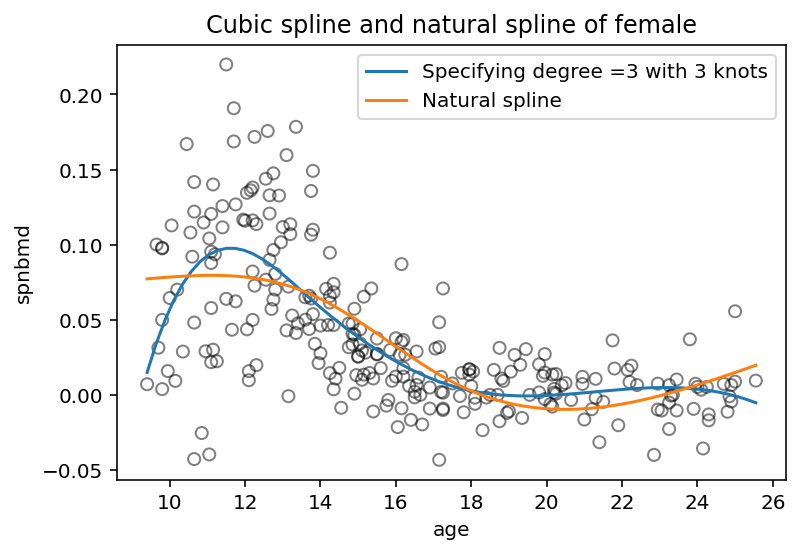

In [59]:
female_sp.plot("Cubic spline and natural spline of female")

In [39]:
class Spline:
    def __init__(self,x,y):
        poly  = PolynomialFeatures(2)
        self.x = poly.fit_transform(x.values.reshape(-1,1))
        self.y = y 
        notec = (np.percentile(x.values, 33),np.percentile(x.values, 67))
        self.cubic = "bs(x, knots=" + str(notec)+ ",degree=3, include_intercept=False)"
        self.natual = "cr(x,knots="+str(notec)+")"
        self.quadratic = "bs(x, knots=" + str(notec)+ ",degree=2, include_intercept=False)"
        self.transformed_x = dmatrix(self.cubic, {"x":x},return_type='dataframe')
        self.transformed_x2 = dmatrix(self.natual, {"x": x}, return_type='dataframe')
        self.x_space = np.linspace(x.min(),x.max(),70)
    def cubicfit(self):
        self.model = sm.OLS(self.y,self.transformed_x).fit()
        self.pred = self.model.predict(dmatrix(self.cubic,{"x": self.x_space},return_type='dataframe'))
        return self.model.summary()
    def naturalfit(self):
        self.model2 = sm.OLS(self.y, self.transformed_x2).fit()
        self.pred2 = self.model2.predict(dmatrix(self.natual, {"x": self.x_space}, return_type='dataframe'))
        return self.model2.summary()
    def quadratic(self):
        self.model = sm.OLS(self.y,self.transformed_x).fit()
        self.pred = self.model.predict(dmatrix(self.cubic,{"x": self.x_space},return_type='dataframe'))
        return self.model.summary()
    
    def plot(self,title):
        plt.subplot()
        x_space = self.x_space 
        plt.title(title)
        plt.scatter(self.x,self.y, facecolor='None', edgecolor='k', alpha=0.5)
        plt.plot(x_space, self.pred, label='Specifying degree =3 with 3 knots')
        plt.plot(x_space,self.pred2,label="Natural spline")
        plt.legend()
        plt.xlabel('age')
        plt.ylabel("spnbmd")
        plt.show()
        

In [60]:
malesp = Spline(male["age"],male["spnbmd"])
malesp.cubicfit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     19.10
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           9.10e-16
Time:                        22:09:19   Log-Likelihood:                 403.36
No. Observations:                 226   AIC:                            -794.7
Df Residuals:                     220   BIC:                            -774.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 0.0428      0.019      2.274      0.024       0.006       0.080
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[0]    -0.0350      0.030     -1.157      0.248      -0.095       0.025
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[1]     0.0856      0.020      4.211      0.000       0.046       0.126
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[2]    -0.0699      0.030     -2.295      0.023      -0.130      -0.010
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[3]    -0.0323      0.027     -1.195      0.233      -0.085       0.021
bs(x, knots=(13.4125, 17.9375), degree=3, include_intercept=False)[4]    -0.0390      0.027     -1.467      0.144      -0.091       0.013
==============================================================================
Omnibus:                       10.895   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.331
Skew:                           0.419   Prob(JB):                      0.00210
Kurtosis:                       3.779   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
malesp.naturalfit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     29.83
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.04e-16
Time:                        22:09:20   Log-Likelihood:                 400.90
No. Observations:                 226   AIC:                            -793.8
Df Residuals:                     222   BIC:                            -780.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.0226      0.003      7.266      0.000       0.016       0.029
cr(x, knots=(13.4125, 17.9375))[0]    -0.0135      0.010     -1.383      0.168      -0.033       0.006
cr(x, knots=(13.4125, 17.9375))[1]     0.0507      0.005     10.256      0.000       0.041       0.060
cr(x, knots=(13.4125, 17.9375))[2]     0.0031      0.006      0.556      0.579      -0.008       0.014
cr(x, knots=(13.4125, 17.9375))[3]    -0.0177      0.011     -1.635      0.103      -0.039       0.004
==============================================================================
Omnibus:                        9.911   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.768
Skew:                           0.407   Prob(JB):                      0.00459
Kurtosis:                       3.692   Cond. No.                     6.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.63e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Continuous piecewise quadratic(12 fitted)

In [66]:
class PiecewiseQdr:
    def __init__(self,data):
        self.data = data
        self.x = data["age"]
        self.y = data["spnbmd"]
        self.datas = [0]*3
        self.notec = (np.percentile(self.x.values, 33),np.percentile(self.x.values, 67))
        notec = self.notec 
        self.datas[0] = data[data["age"]<= notec[0]]
        self.datas[1] = data[(notec[0]<= data['age']) &( data["age"]<=notec[1])]
        self.datas[2] = data[data["age"]>=notec[1]]
    def fit(self):
        model,poly_x = [0]*3,[0]*3
        datas = self.datas 
        poly = PolynomialFeatures(2)
        self.poly = poly 
        for i in range(3):
            poly_x[i] = poly.fit_transform(datas[i]['age'].to_frame())
            model[i] = sm.OLS(datas[i]['spnbmd'],poly_x[i]).fit()
        self.model = model 
        # return model[0].summary(),model[1].summary(),model[2].summary()
    def plot(self):
        datas = self.datas 
        pred = []
        plt.figure()
        plt.scatter(self.x,self.y, facecolor='None', edgecolor='k', alpha=0.5)
        for i in range(3):
            test_ages = np.linspace(datas[i]['age'].min(),datas[i]['age'].max(),100)
            X_test = self.poly.transform(test_ages.reshape(-1,1))
            pred.append(self.model[i].predict(X_test))
            plt.plot(test_ages,np.array(pred[i]).reshape(-1,1))
        plt.show()

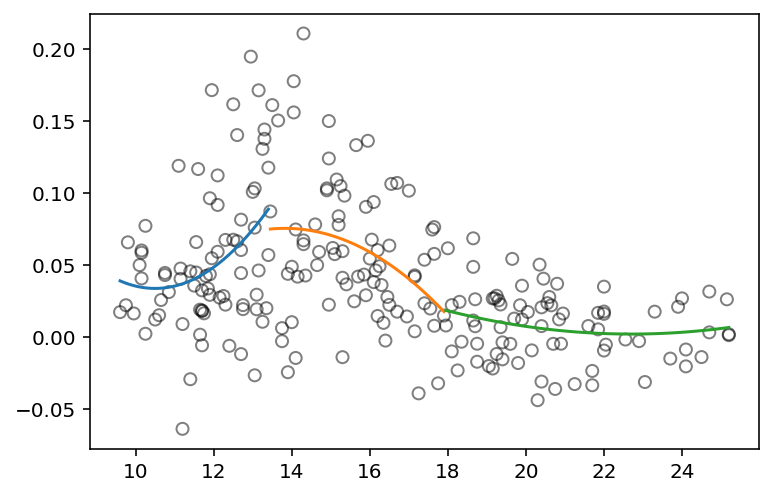

In [70]:
model = PiecewiseQdr(data[data['gender']=='male'])
model.fit()
model.plot()

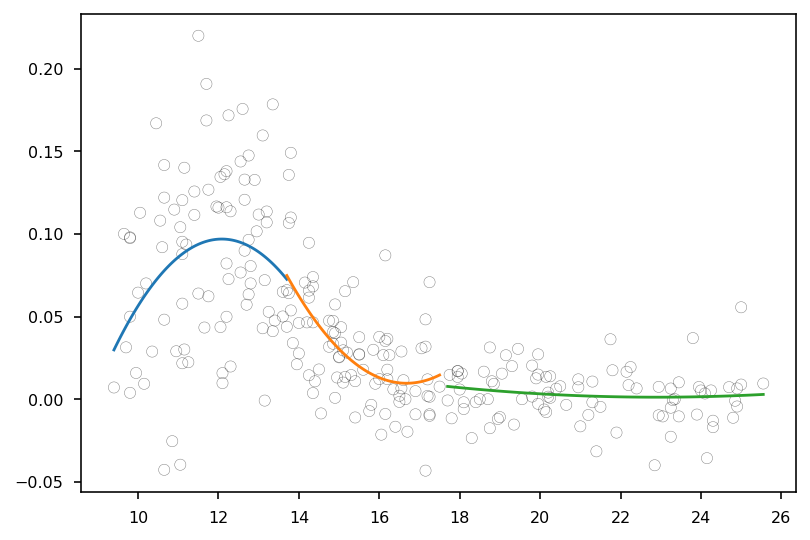

In [169]:
model = PiecewiseQdr(data[data['gender']=='female'])
model.fit()
model.plot()

In [111]:
def CPiecewiseQdr(x0,x):
    p_1 = np.percentile(x0,33)
    p_2 = np.percentile(x0,67)
    bins1 = [0, p_1, p_2, 100]
    df_cut, bins = pd.cut(x, bins1, retbins=True, right=False)
    stepsdum = pd.get_dummies(df_cut)
    x_x = pd.concat([x,x], axis = 1)
    x_x_x = np.array(pd.concat([x,x_x], axis = 1))
    x_step_dummies = np.multiply(np.array(stepsdum), x_x_x)
    xstp_2 = x_step_dummies[:,1]
    xstp_2 = xstp_2[xstp_2 > 0]
    xstp_3 = x_step_dummies[:,2]
    xstp_3 = xstp_3[xstp_3 > 0]
    c1 = xstp_2.min()
    c2 = xstp_3.min()
    stepsdum = stepsdum.drop(stepsdum.columns[0], axis = 1)
    stepsdum = sm.add_constant(stepsdum)
    dummies = np.array(stepsdum)
    dummies[:,1] = np.add(dummies[:,2],dummies[:,1])
    dummies0 = dummies
    dummies = np.insert(dummies, 0 ,values = dummies0[:, 0], axis =1)
    dummies = np.insert(dummies, 2 ,values = dummies0[:, 1], axis =1)
    dummies = np.insert(dummies, 4 ,values = dummies0[:, 2], axis =1)
    polynomial_features = PolynomialFeatures(degree=2)
    xp4 = polynomial_features.fit_transform(np.array(x).reshape(-1,1))
    xp4 = xp4[:,1:]
    x_c1 = polynomial_features.fit_transform((np.array(x)-c1).reshape(-1,1))
    x_c1 = x_c1[:,1:]
    x_c2 = polynomial_features.fit_transform((np.array(x)-c2).reshape(-1,1))
    x_c2 = x_c2[:,1:]
    xp4_1 = np.concatenate((xp4,x_c1), axis = 1)
    xp4_2 = np.concatenate((xp4_1,x_c2), axis = 1)
    X_CPiecewiseQdr = np.multiply(dummies, xp4_2)
    X_CPiecewiseQdr = sm.add_constant(X_CPiecewiseQdr)
    return X_CPiecewiseQdr

In [126]:
X_c = CPiecewiseQdr(data[data['gender']=='male']['age'],data[data['gender']=='male']['age'])
model_1 = sm.OLS(data[data['gender']=='male']['spnbmd'], X_c).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     15.93
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.54e-15
Time:                        22:58:23   Log-Likelihood:                 403.55
No. Observations:                 226   AIC:                            -793.1
Df Residuals:                     219   BIC:                            -769.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5414      0.520      1.040      0.299      -0.484       1.567
x1            -0.0991      0.089     -1.116      0.266      -0.274       0.076
x2             0.0048      0.004      1.285      0.200      -0.003       0.012
x3            -0.0362      0.021     -1.748      0.082      -0.077       0.005
x4            -0.0069      0.004     -1.940      0.054      -0.014       0.000
x5             0.0165      0.015      1.067      0.287      -0.014       0.047
x6             0.0028      0.002      1.446      0.150      -0.001       0.007
==============================================================================
Omnibus:                       10.544   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.362
Skew:                           0.391   Prob(JB):                      0.00207
Kurtosis:                       3.837   Cond. No.                     5.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
X_c = CPiecewiseQdr(data[data['gender']=='female']['age'],data[data['gender']=='female']['age'])
model_2 = sm.OLS(data[data['gender']=='female']['spnbmd'], X_c).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spnbmd   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     47.27
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.27e-38
Time:                        22:58:26   Log-Likelihood:                 503.93
No. Observations:                 259   AIC:                            -993.9
Df Residuals:                     252   BIC:                            -969.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2126      0.335     -3.624      0.000      -1.871      -0.554
x1             0.2160      0.057      3.791      0.000       0.104       0.328
x2            -0.0089      0.002     -3.705      0.000      -0.014      -0.004
x3            -0.0133      0.017     -0.802      0.423      -0.046       0.019
x4             0.0153      0.003      5.928      0.000       0.010       0.020
x5            -0.0139      0.014     -1.015      0.311      -0.041       0.013
x6            -0.0059      0.002     -2.910      0.004      -0.010      -0.002
==============================================================================
Omnibus:                       14.698   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               39.283
Skew:                          -0.022   Prob(JB):                     2.95e-09
Kurtosis:                       4.907   Cond. No.                     4.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
x_male = data[data['gender']=='male']['age']
y_male = data[data['gender']=='male']['spnbmd']
x_female = data[data['gender']=='female']['age']
y_female = data[data['gender']=='female']['spnbmd']

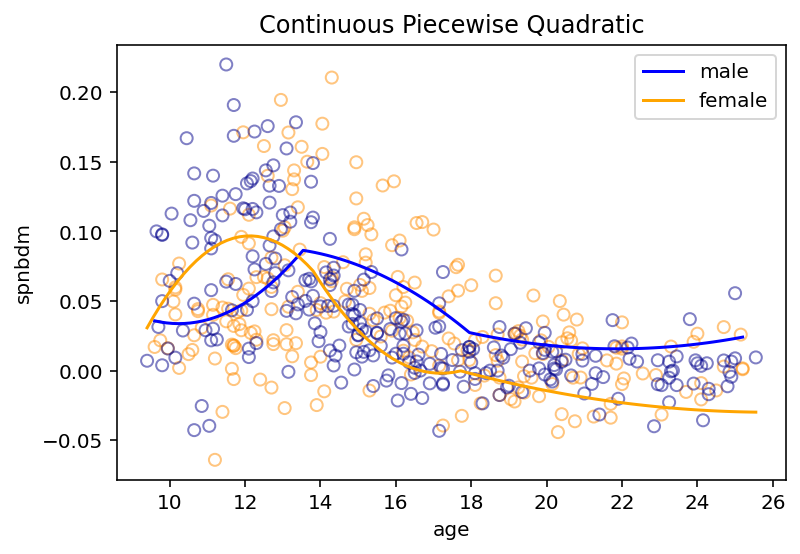

In [139]:
x_space1 = pd.DataFrame(np.linspace(x_male.min(),x_male.max(),100)).iloc[:,0]
x_space2 = pd.DataFrame(np.linspace(x_female.min(),x_female.max(),100)).iloc[:,0]
x_pred1 = CPiecewiseQdr(x_male,x_space1)
x_pred2 = CPiecewiseQdr(x_female,x_space2)
pred1 = model_1.predict(x_pred1)
pred2 = model_2.predict(x_pred2)
plt.plot(x_space1, pred1, color='blue', label='male')
plt.plot(x_space2, pred2, color='orange', label='female')
plt.scatter(x_male, y_male, facecolor='None', edgecolor='darkorange',alpha=0.5)
plt.scatter(x_female, y_female, facecolor='None', edgecolor='darkblue',alpha = 0.5)
plt.legend()
plt.xlabel('age')
plt.ylabel('spnbdm')
plt.title('Continuous Piecewise Quadratic')
plt.show()

# 3

In [58]:
#Cubic Spline

In [72]:
from sklearn.model_selection import KFold

In [109]:
class cvspline:
    def __init__(self,data):
        self.data = data
        self.x = data["age"]
        self.y = data["spnbmd"]
        self.male = data[data['gender']=='male']
        self.female =data[data['gender']=='female']
        self.male_x = self.male['age']
        self.male_y = self.male['spnbmd']
        self.female_x = self.female['age']
        self.female_y = self.female['spnbmd']
        self.male_r = []
        self.female_r = []
        self.cv()
        self.score()
        self.plot_best()
    def cv(self):
        self.male_r = self.fit(self.male_x,self.male_y)
        self.female_r = self.fit(self.female_x,self.female_y)

    def fit(self,X,y):
        mr2 = []
        kf = KFold(n_splits=5)
        for i in range(6):
            r2  = []
            for train_index, test_index in kf.split(X): 
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                bins = self.find_knots(X_train, i+2)
                transformed_x = dmatrix("bs(x, knots=bins, degree=3, include_intercept=False)", {"x": X_train},return_type='dataframe')
                model = sm.OLS(y_train, transformed_x).fit()
                y_pred = model.predict(dmatrix("bs(x, knots=bins, include_intercept=False)", {"x": X_test},return_type='dataframe'))
                r2.append(self.calR(y_test, y_pred))
            mr2.append(np.mean(r2))
        return mr2
    def score(self):
        print('male')
        print(self.male_r)
        print('female')
        print(self.female_r)
    def find_knots(self,x,k):
        df_cut, bins = pd.qcut(x,k, retbins=True)
        return tuple(bins[1:k])
    def calR(self,y,y_p):
        return np.sum((y_p-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
    def plot_best(self):
        x = self.data['age']
        y = self.data['spnbmd']
        bins = self.find_knots(x, 4)
        transformed_x = dmatrix("bs(x, knots=bins, degree=3, include_intercept=False)", {"x": x},return_type='dataframe')
        model = sm.OLS(y, transformed_x).fit()
        x_space = np.linspace(x.min(),x.max(),70)
        pred = model.predict(dmatrix("bs(x, knots=bins,degree =3,include_intercept=False)", {"x": x_space}, return_type='dataframe'))
        plt.scatter(x, y, facecolor='None', edgecolor='r', alpha=0.3)
        plt.plot(x_space, pred, color='b')
        plt.xlabel('age')
        plt.ylabel('spnbdm')
        plt.title('cubic splie with 4 knots')
        plt.show()
    
        

male
[0.32548827771529665, 0.3280511006204708, 0.3325379905215174, 0.3231106619377165, 0.32192748328911136, 0.31734809226269534]
female
[0.6413161070631618, 0.6644050590045869, 0.6810152446561877, 0.6787711432427831, 0.6730587473387146, 0.6713962570758005]


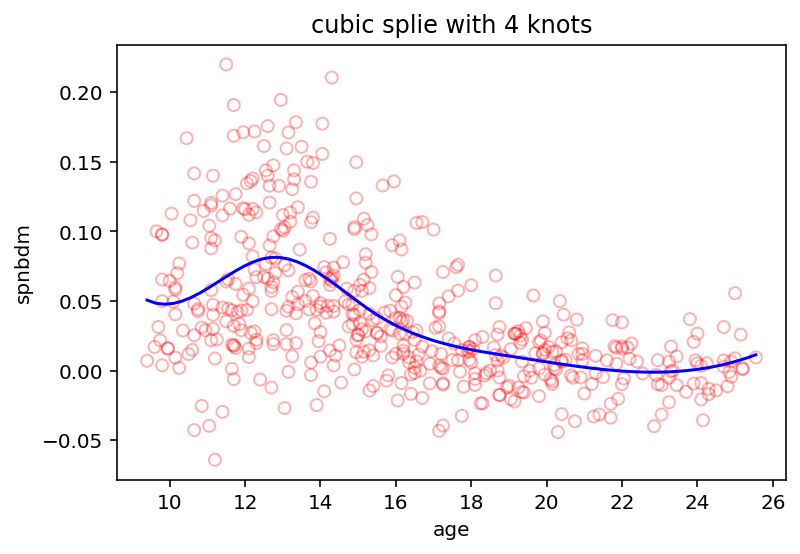

In [110]:
cvspline(data)

When k = 4, the performance of model is best.